# Task-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Set visualization style
plt.style.use('seaborn')
plt.figure(figsize=(15,10))

C:\Users\disha\AppData\Local\Temp\ipykernel_16148\2133016814.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

## 1. Data Loading and Preparation

In [4]:
def data_overview():
    print("Dataset Shapes:")
    print(f"Customers: {customers.shape}")
    print(f"Products: {products.shape}")
    print(f"Transactions: {transactions.shape}")
    
    print("\nMissing Values:")
    print(customers.isnull().sum())
    print(products.isnull().sum())
    print(transactions.isnull().sum())

In [5]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## 2. Merged Data

In [8]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
merged_data.drop('Price_y', axis=1) 
merged_data = merged_data.rename(columns={'Price_x': 'Price'})


In [9]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [10]:
# Convert date columns
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

## 3. Customer Analysis

In [11]:
def customer_insight():
    # Signup Analysis
    customers['SignupYear'] = customers['SignupDate'].dt.year
    signup_distribution = customers['SignupYear'].value_counts().sort_index()
    
    plt.subplot(2, 2, 1)
    signup_distribution.plot(kind = "bar")
    plt.title("Customers Signup by Year")
    plt.xlabel("year")
    plt.ylabel("Number of signups")
    plt.xticks(rotation = 45)
    
    # Regional Distribution
    
    regional_distribution = customers['Region'].value_counts()
    plt.subplot(2, 2, 2)
    regional_distribution.plot(kind = "pie", autopct = "%1.1f%%")
    plt.title("Customer Distribution by Region")
    

## 4. Product Analysis

In [12]:
def product_insight():
    # Cateogory Analysis
    category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_index(ascending = False)
    plt.subplot(2, 2, 3)
    category_sales.plot(kind = "bar")
    plt.title("Total Sales by Product Category")
    plt.xlabel("Category")
    plt.ylabel("Total Sales Value")
    plt.xticks(rotation = 45)
    

## 5. Transaction Analysis

In [13]:
def transaction_insight():
    merged_data['TransactionYear'] = merged_data['TransactionDate'].dt.year
    yearly_transaction = merged_data.groupby('TransactionYear')['TotalValue'].sum()
    plt.subplot(2,2,4)
    yearly_transaction.plot(kind = "line", marker = "o")
    plt.title("Yearly Sales Trend")
    plt.xlabel("Year")
    plt.ylabel("Total Sales Value")

## 6. Top Customer Analysis

In [14]:
def top_customer_insight():
    customer_total_purchases = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
    customer_purchases = customer_total_purchases.merge(customers[['CustomerID', 'CustomerName']], on = 'CustomerID')
    
    # Find Top Customer
    top_customer = customer_purchases.loc[customer_purchases['TotalValue'].idxmax()]
    
    plt.figure(figsize = (12, 6))
    top_10_customers = customer_purchases.sort_values('TotalValue', ascending = False).head(10)
    sns.barplot(x = "CustomerName", y="TotalValue", data = top_10_customers)
    plt.title("Top 10 Customer by Total purchase Value")
    plt.xlabel("Customer Name")
    plt.ylabel("Total Purchase Value")
    plt.xticks(rotation = 45, ha = "right")
    plt.tight_layout()
    plt.savefig("Top_customer.png")

## 7. Executing all Analysis function 

Dataset Shapes:
Customers: (200, 4)
Products: (100, 4)
Transactions: (1000, 7)

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


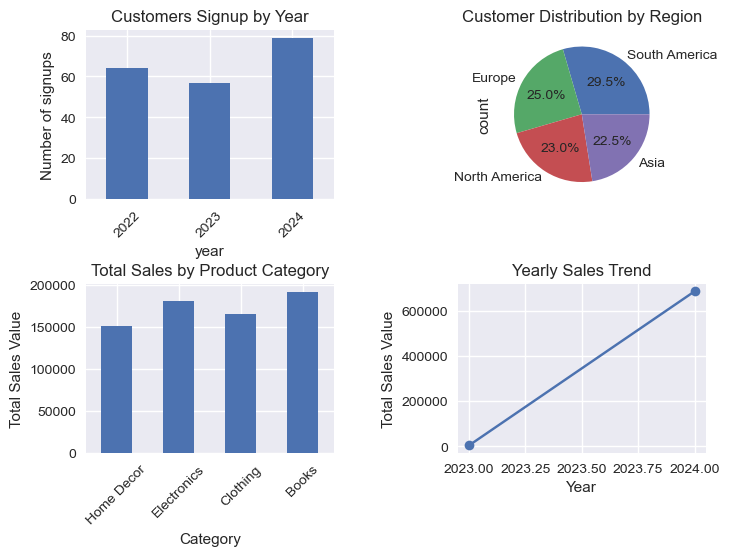

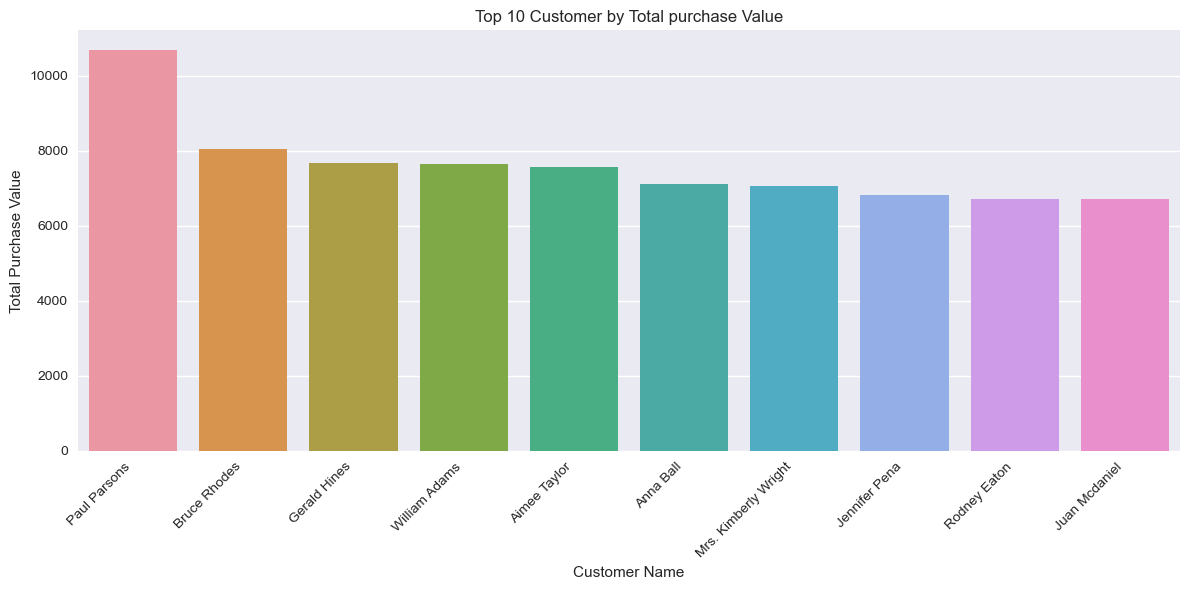

In [15]:
data_overview()
plt.tight_layout()
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
customer_insight()
product_insight()
transaction_insight()
plt.savefig("analysis.png")
plt.show()

top_customer_insight()


## 7. Key Bussiness Insight

In [16]:
def generate_business_insights():
    customer_total_purchases = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
    customer_purchases = customer_total_purchases.merge(customers[['CustomerID', 'CustomerName']], on = 'CustomerID')
    
    # Find Top Customer
    top_customer = customer_purchases.loc[customer_purchases['TotalValue'].idxmax()]
    
    insights = {
        "\033[1mCustomer Growth\033[0m": f" Customer signups peaked in \033[4m{customers['SignupYear'].mode().values[0]}\033[0m, indicating a potential key growth year or successful marketing campaign.",
        "\033[1mRegional Market\033[0m": f"The top region for customers is \033[4m{customers['Region'].mode().values[0]}\033[0m, suggesting a strong market presence in this area.",
        "\033[1mProduct Performance\033[0m": f"The top-selling product category is \033[4m{merged_data.groupby('Category')['TotalValue'].sum().idxmax()}\033[0m, representing the most lucrative product line.",
        "\033[1mSales Trend\033[0m": f"Yearly sales \033[4m{'increased' if merged_data.groupby('TransactionYear')['TotalValue'].sum().is_monotonic_increasing else 'fluctuated'}\033[0m, showing market dynamics.",
        "\033[1mCustomer Value\033[0m": f"The average transaction value is \033[4m${merged_data['TotalValue'].mean():.2f}\033[0m, providing insights into customer spending patterns.",  # Added missing closing quotation mark
        "\033[1mTop Customer\033[0m": f"Top Customer: \033[4m{top_customer['CustomerName']}\033[0m (ID: \033[4m{top_customer['CustomerID']}\033[0m) with total purchases of \033[4m${top_customer['TotalValue']:,.2f}\033[0m"
    }
    
    return insights


In [19]:
# Print Business Insights
business_insights = generate_business_insights()
print("\033[1mBUSINESS INSIGHTS:\n\033[0m")
for title, insight in business_insights.items():
    print(f"{title}: {insight}")

BUSINESS INSIGHTS:

Customer Growth:  Customer signups peaked in 2024, indicating a potential key growth year or successful marketing campaign.
Regional Market: The top region for customers is South America, suggesting a strong market presence in this area.
Product Performance: The top-selling product category is Books, representing the most lucrative product line.
Sales Trend: Yearly sales increased, showing market dynamics.
Customer Value: The average transaction value is $690.00, providing insights into customer spending patterns.
Top Customer: Top Customer: Paul Parsons (ID: C0141) with total purchases of $10,673.87
